## Projeto Modulo 3 & 4

**DESCRIÇÃO**

Eu, como Gestor de Conteúdo, gostaria de uma ferramenta capaz de apontar qual o tema, gênero e atores da minha próxima produção, com a maior possibilidade de sucesso, para que não tenha desperdício de investimento.

**REGRAS DE NEGÓCIO**
- Considerar para o Tema (Série, Filme ou Documentário) a média de notas
- Considerar para Gênero (Romance, Ficção, Aventura, Comédia, ...) a quantidade de visualizações &#x2705;
- Considerar para atores, a relação da quantidade de filmes X número de Visualizações X notas.

**CRITÉRIOS DE ACEITE**
- Ter apenas uma sugestão
- Ser apresentada a base de cálculo e estimativa
- Considerar os últimos 100 lançamentos &#x2705;

#### Bibliotecas

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

**Importando Tabelas**

In [73]:
path = '.'

for arq in os.listdir(path):
    if arq.endswith('.csv'):
        globals()['df_' + arq[5:-4]] = pd.read_csv(arq)
        print('df_{}'.format(arq[5:-4]))  

df_movies
df_names
df_ratings


**ETL Movies**

Funcao de Suporte

In [115]:
# Seleciona os 100 últimos lançamentos
df_movies_copy = df_movies.sort_values(by='date_published', ascending=False).head(100)

In [4]:
df_etl_movies = df_movies_copy[['imdb_title_id', 'genre', 'votes']]

# Identifica os gêneros dos filmes
df_genre = df_etl_movies.genre.str.split(expand=True, pat=',')
df_genre = df_genre.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_genre = df_genre[0].append([df_genre[1], df_genre[2]]).unique()

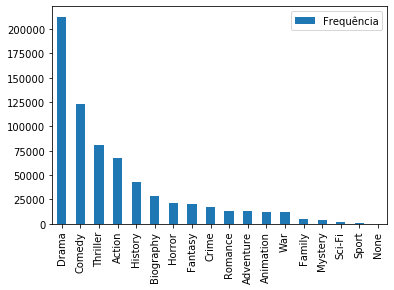

In [18]:
# Verifica a frequência de cada gênero no dataframe
lista_generos = []
for g in df_genre:
    try:
        # Foi considerado o número de votos, no lugar de número de visualizações, para definir o gênero mais assistido.
        lista_generos.append(df_etl_movies.loc[df_etl_movies['genre'].str.contains(g)]['votes'].sum())        
    except:
        lista_generos.append(None)
        
df = pd.DataFrame(lista_generos, df_genre, columns = ['Frequência'])
df = df.sort_values(by='Frequência', ascending = False)
ax = df.plot(kind='bar')

plt.show()

In [75]:
df_etl_actors = df_movies_copy[['imdb_title_id','actors','votes']]
df_etl_actors

,imdb_title_id,actors,votes
80320,tt8390612,"Arndís Hrönn Egilsdóttir, Sveinn Ólafur Gunnar...",174
80605,tt8717446,"Kate Winslet, Sam Neill, Mia Wasikowska, Rainn...",142
80337,tt8399664,"Ben Mendelsohn, Essie Davis, Eliza Scanlen, Em...",301
80988,tt9206516,"Emma Dib, Armando Espitia",115
80248,tt8323120,"Catherine Deneuve, Juliette Binoche, Ethan Haw...",579
...,...,...,...
81171,tt9626278,"Tallie Medel, Norma Kuhling, Lorelei Romani, C...",149
81136,tt9534808,"Sean Patrick Flanery, Dolph Lundgren, Chuck Li...",239
80072,tt8151874,"Shia LaBeouf, Lucas Hedges, Noah Jupe, Byron B...",1318
81133,tt9526826,"Soubin Shahir, Suraj Venjaramoodu, Kendy Zirdo...",1176


Funcao de Suporte

In [76]:
def define_profession(x):
    if 'actor' in str(x) or 'actress' in str(x):
        return True
    else:
        return False

In [77]:
df_names_copy = df_names[['name','death_year','primary_profession']]
pd.options.mode.chained_assignment = None # Desabilita o Warning
df_names_copy['Validation'] = df_names_copy['primary_profession'].apply(define_profession)
df_names_copy = df_names_copy[(df_names_copy.death_year.isnull()) & (df_names_copy.Validation == True)]
df_names_copy = np.array(df_names_copy['name'])

In [83]:
name = 'Jordan'
df_etl_actors[df_etl_actors['actors'].str.contains(name)]['votes'].sum()

4195

In [84]:
df_etl_actors[df_etl_actors['actors'].str.contains(name)]

,imdb_title_id,actors,votes
73383,tt4916630,"Brie Larson, Michael B. Jordan, Jamie Foxx, Ti...",483
56129,tt1458902,"Dean Cain, Stormi Maya, Stefanie Bloom, Devin ...",149
59631,tt1780967,"Kristen Stewart, Margaret Qualley, Zazie Beetz...",486
62370,tt2114504,"Eric Bauza, Timothy Omundson, Graham Verchere,...",2941
78164,tt6886080,"Malin Akerman, Shea Whigham, Tony Hale, Kara H...",136


In [124]:
dict_a = {}
for lista in range(100):
    for ator in df_movies_copy.iloc[lista,12].split(','):
        if ator.strip() in dict_a.keys():
            dict_a[ator.strip()] = dict_a[ator.strip()] + 1
        else:
            dict_a[ator.strip()] = 1
            
df_count_movies = pd.DataFrame.from_dict(dict_a, orient='index').sort_values(by=0, ascending=False)
df_count_movies

,0
Andrea Riseborough,2
Walton Goggins,2
LaMonica Garrett,2
Gael García Bernal,2
Wagner Moura,2
...,...
Sidney Cole,1
Juan Minujín,1
Anthony Hopkins,1
Jonathan Pryce,1


In [120]:
dict_a = {}
for lista in range(100):
    for ator in df_movies_copy.iloc[lista,12].split(','):
        if ator.strip() in dict_a.keys():
            dict_a[ator.strip()] = dict_a[ator.strip()] + df_movies_copy.iloc[lista,15]
        else:
            dict_a[ator.strip()] = df_movies_copy.iloc[lista,15]
            
df_count_votes = pd.DataFrame.from_dict(dict_a, orient='index').sort_values(by=0, ascending=False)
df_count_votes

,0
Jeong Esuz,74076
So-dam Park,74076
Woo-sik Choi,74076
Yeo-jeong Jo,74076
Sun-kyun Lee,74076
...,...
Katerina Lipovska,111
Katinka Auberger,111
Dimitar Banenkin,111
Adelia-Constance Ocleppo,111


In [125]:
df_count_movies.merge(df_count_votes, left_on=0)

TypeError: object of type 'NoneType' has no len()